Episode: 0 Total Reward: -27188
Episode: 1 Total Reward: -23948
Episode: 2 Total Reward: -24271
Episode: 3 Total Reward: -24321
Episode: 4 Total Reward: -23458
Episode: 5 Total Reward: -24311
Episode: 6 Total Reward: -24651
Episode: 7 Total Reward: -23975
Episode: 8 Total Reward: -23977
Episode: 9 Total Reward: -24275
Episode: 10 Total Reward: -24423
Episode: 11 Total Reward: -24363
Episode: 12 Total Reward: -23880
Episode: 13 Total Reward: -23925
Episode: 14 Total Reward: -23688
Episode: 15 Total Reward: -23855
Episode: 16 Total Reward: -24206
Episode: 17 Total Reward: -24280
Episode: 18 Total Reward: -24400
Episode: 19 Total Reward: -24597
Episode: 20 Total Reward: -23349
Episode: 21 Total Reward: -24258
Episode: 22 Total Reward: -24496
Episode: 23 Total Reward: -24625
Episode: 24 Total Reward: -24720
Episode: 25 Total Reward: -24000
Episode: 26 Total Reward: -24109
Episode: 27 Total Reward: -23831
Episode: 28 Total Reward: -23730
Episode: 29 Total Reward: -24371
Episode: 30 Total Re

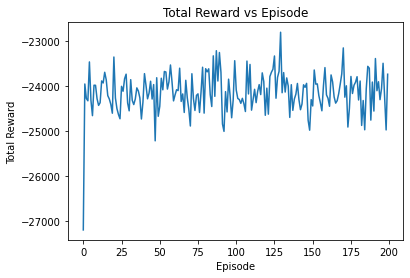

[[ -6.04396458  -6.24684043  -6.         ... -21.         -23.5
  -25.99998546]
 [ -8.04647386  -5.05208798  -5.         ... -20.         -22.5
  -25.        ]
 [ -5.92522795  -4.79664222  -4.         ... -19.         -21.5
  -24.        ]
 ...
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]
 [  0.           0.           0.         ...   0.           0.
    0.        ]]


In [2]:
#QLearning
import random
import numpy as np
import matplotlib.pyplot as plt

def state_creator(B, K):
    return [(i, j) for i in range(B + 1) for j in range(K + 1)]

def tirage(p):
  pcumul = [sum(p[k] for k in range(0,j+1)) for j in range(0,len(p))]
  y = 0
  x = random.random()
  while (x>=pcumul[y]):
    y += 1
  return y

random.seed(10)

def generate_list(b):
    result = []
    for i in range(b - 1):
        result.append(random.uniform(0, 1 - sum(result)))
    result.append(1 - sum(result))
    return result

def uniform_prob_list(b):
    return [1/b for i in range(b)]

def q_learning(PA, Q, state_list, num_episodes, alpha, gamma, C, d, b, K, B):

  Q=np.array(Q)
  rewards = []  # Initialize list to store total rewards for each episode
  
  for episode in range(num_episodes):
        state = 0 # initialize the state
        total_reward = 0 # initialize the total reward for the episode
        for step in range(5000):
          #simuler les arrivés            pas besoin
          #i= random.randrange(b+1)
          # Choisir une action avec la stratégie d'exploration epsilon-greedy
          if np.random.uniform(0, 1) < 0.3:  # exploration
            a = np.random.choice(range(K+1))
          else:  # exploitation
            a = np.argmax(Q[state]) # choose action based on policy
          # Simulation de la transition à l'état suivant
          #print("action:", a)
          m = min(B, max(0, state_list[state][0] + tirage(PA) - a*d))
          m = int(m)
          n = int(a)
          sp = (m, n)
          #print(sp)
          # Calculation du reward
          reward = a*C + max(0, a - state_list[state][1])*C + max(0, state_list[state][1] - a)*C + m*C
          reward = -reward
          #update total reward for the episode
          total_reward += reward 
          # Mettre à jour la table Q
          #Q[state, a] = (1-alpha) *Q[state, a] + alpha * (reward + gamma * np.max(Q[state_list.index(sp)]) )
          Q[state, a] = (1-alpha) *Q[state, a] + alpha * (reward + gamma *np.max(Q[state_list.index(sp), :]))
          state = state_list.index(sp)  # mettre à jour l'état courant, qui sera m+n+2
        print("Episode: {} Total Reward: {}".format(episode, total_reward))
        rewards.append(total_reward)  # Add the total reward for this episode to the list
  plt.plot(range(num_episodes), rewards)  # Plot the total reward of each episode
  plt.xlabel('Episode')  # Label for x-axis
  plt.ylabel('Total Reward')  # Label for y-axis
  plt.title('Total Reward vs Episode')  # Plot title
  plt.show()  # Display the plot
  return Q

# Paramètres du système
K = 10  # nombre de VMs
B = 50  # capacité du système
b = 5  # taille maximale du batch
PA = uniform_prob_list(b)  # distribution de probabilité pour les arrivées de paquets
d = 2  # nombre de paquets servis par slot
C = 1  # cout de 1
alpha = 0.5
gamma = 0.5
num_episodes=200

# Initialisation de la table Q
A=(K+1)*(B+1)
Q = np.zeros((A, K+1))
#print(Q)
state_list = state_creator(B, K)
#print(state_list)
Q = q_learning(PA, Q, state_list, num_episodes, alpha, gamma, C, d, b, K, B)
print(Q)

